In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# just for Women
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

In [ ]:
df.info()
## No Null In First Observation But Let's Look At This Deep 

In [ ]:
fig, [[ax1, ax2, ax3], [ax4 ,ax5, ax6], [ax7, ax8, ax9 ]] = plt.subplots(nrows=3, ncols=3,
                               figsize=(14, 20))

ax1.boxplot(df['Pregnancies'])
ax1.set_title('Pregnancies Outlier')

ax2.boxplot(df['Glucose'])
ax2.set_title('Glucose Outlier')

ax3.boxplot(df['BloodPressure'])
ax3.set_title('BloodPressure Outlier')

ax4.boxplot(df['SkinThickness'])
ax4.set_title('SkinThickness Outlier')

ax5.boxplot(df['Insulin'])
ax5.set_title('Insulin Outlier')

ax6.boxplot(df['BMI'])
ax6.set_title('BMI Outlier')

ax7.boxplot(df['DiabetesPedigreeFunction'])
ax7.set_title('DiabetesPedigreeFunction Outlier')

ax8.boxplot(df['Age'])
ax8.set_title('Age Outlier')


In [ ]:
sns.distplot(df['Pregnancies'])

In [ ]:
# print Just For Be Clear Underestanding
def detect_outlier(data):
    q1 = np.quantile(data, 0.25)
    print('0.25: ', q1)
    q3 = np.quantile(data, 0.75)
    print('0.75:', q3)
    iqr = q3 - q1 
    low = q1 - (1.5 * iqr)
    ## we does not care about minus values
    #if low <= 0:
    #    low = q1
    #else:
    #    pass
    print('bottom:', low)
    high = q3 + (1.5 * iqr)
    print('ceiling:', high)
    return high, low 

In [ ]:
high, bottom = detect_outlier(df['Pregnancies'])
df  = df[(df['Pregnancies'] > bottom) & (df['Pregnancies'] < high)]
df['Pregnancies'].plot(kind='box')
plt.figure()
df['Pregnancies'].plot(kind='hist', bins=50)

In [ ]:
high, bottom = detect_outlier(df['Age'])
df  = df[(df['Age'] > bottom) & (df['Age'] < high)]
df['Age'].plot(kind='box')
plt.figure()
df['Age'].plot(kind='hist', bins=50)

In [ ]:
high, bottom = detect_outlier(df['Glucose'])
df  = df[(df['Glucose'] > bottom) & (df['Glucose'] < high)]
df['Glucose'].plot(kind='box')
plt.figure()
df['Glucose'].plot(kind='hist', bins=50)

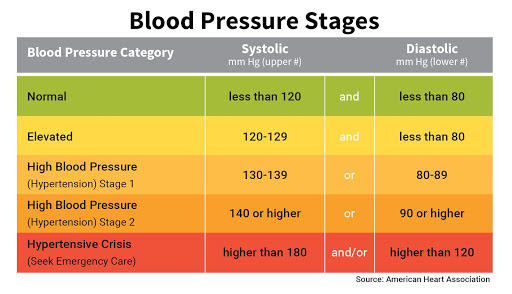

In [ ]:
high, bottom = detect_outlier(df['BloodPressure'])
df  = df[(df['BloodPressure'] > bottom) & (df['BloodPressure'] < high)]
df['BloodPressure'].plot(kind='box')
plt.figure()
df['BloodPressure'].plot(kind='hist', bins=50)

### If Look At the Bottom See Sime Negative Values But 0 Is Bigger Than Negative Value So In This Particular Way Delete It By Hand Like This :

In [ ]:
df['Insulin'].value_counts()
# If We Remove Zero We loss More information So Replace It By Trim_Mean
print('Trustable_Mean:', stats.trim_mean(df['Insulin'], 0.2))
df['Insulin'] = df['Insulin'].replace(0, 53.94)

high, bottom = detect_outlier(df['Insulin'])
df  = df[(df['Insulin'] > bottom) & (df['Insulin'] < high)]
df['Insulin'].plot(kind='box')
plt.figure()
df['Insulin'].plot(kind='hist', bins=100)

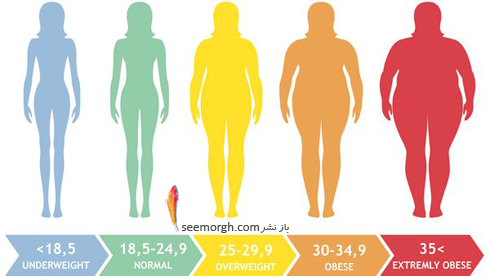

In [ ]:
high, bottom = detect_outlier(df['BMI'])
df  = df[(df['BMI'] > bottom) & (df['BMI'] < high)]
df['BMI'].plot(kind='box')
plt.figure()
df['BMI'].plot(kind='hist', bins=100)

In [ ]:
high, bottom = detect_outlier(df['DiabetesPedigreeFunction'])
df  = df[(df['DiabetesPedigreeFunction'] > bottom) & (df['DiabetesPedigreeFunction'] < high)]
df['DiabetesPedigreeFunction'].plot(kind='box')
plt.figure()
df['DiabetesPedigreeFunction'].plot(kind='hist', bins=100)

## Now it's More Clear Than Before 
### Look the Range Of unsulin Before Was more than 350 now Be 150 

In [ ]:
fig, [[ax1, ax2, ax3], [ax4 ,ax5, ax6], [ax7, ax8, ax9 ]] = plt.subplots(nrows=3, ncols=3,
                               figsize=(14, 20))

ax1.boxplot(df['Pregnancies'])
ax1.set_title('Pregnancies Outlier')

ax2.boxplot(df['Glucose'])
ax2.set_title('Glucose Outlier')

ax3.boxplot(df['BloodPressure'])
ax3.set_title('BloodPressure Outlier')

ax4.boxplot(df['SkinThickness'])
ax4.set_title('SkinThickness Outlier')

ax5.boxplot(df['Insulin'])
ax5.set_title('Insulin Outlier')

ax6.boxplot(df['BMI'])
ax6.set_title('BMI Outlier')

ax7.boxplot(df['DiabetesPedigreeFunction'])
ax7.set_title('DiabetesPedigreeFunction Outlier')

ax8.boxplot(df['Age'])
ax8.set_title('Age Outlier')


In [ ]:
sns.pairplot(df, hue='Outcome')


In [ ]:
plt.figure(figsize=(20, 12))
print('method :pearson, kendal, spearman')
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.1)

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max = MinMaxScaler()
stn = StandardScaler()
x_min_max = min_max.fit_transform(x)
x_finall = stn.fit_transform(x_min_max)

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('standard', StandardScaler()), ('min_max', MinMaxScaler())])
x1_finall = pipe.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_finall, y)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rn = RandomForestClassifier(n_estimators=100, max_depth=7)
rn.fit(x_train, y_train)
print(rn.score(x_train, y_train))
predict = rn.predict(x_test)
print(accuracy_score(y_test, predict))
confusion_matrix(predict, y_test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1_finall, y)
rn.fit(x_train, y_train)
print(rn.score(x_train, y_train))
predict = rn.predict(x_test)
print(accuracy_score(y_test, predict))
confusion_matrix(predict, y_test)